# Pytorch基礎運算元件介紹 
<font size=4>
1. Pytorch-卷積運作與參數生成 <br>
2. Pytorch 怎麼使用Pool、Activation function和宣告自己想建立的結構<br>
</font>
    
##  I. Pytorch-卷積運作與參數生成
 本課程主旨在介紹深度學習中卷積神經網路(Convolutional neural network, CNN)在pytorch的卷積(convolution, Conv.)運算相關的知識，包含<br> 
 <font size=4>
1. Conv.的參數設定<br>
2. Conv.怎麼運算<br>
3. Conv.權重如何生成<br>
4. 權重那要用哪生成方式<br>
    
    
Note: 此課程介紹的皆以2D卷積為主。
    
下圖取自我部落格文章[卷積神經網路(Convolutional neural network, CNN) — CNN運算流程](https://chih-sheng-huang821.medium.com/%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-convolutional-neural-network-cnn-cnn%E9%81%8B%E7%AE%97%E6%B5%81%E7%A8%8B-ecaec240a631)的圖片
    
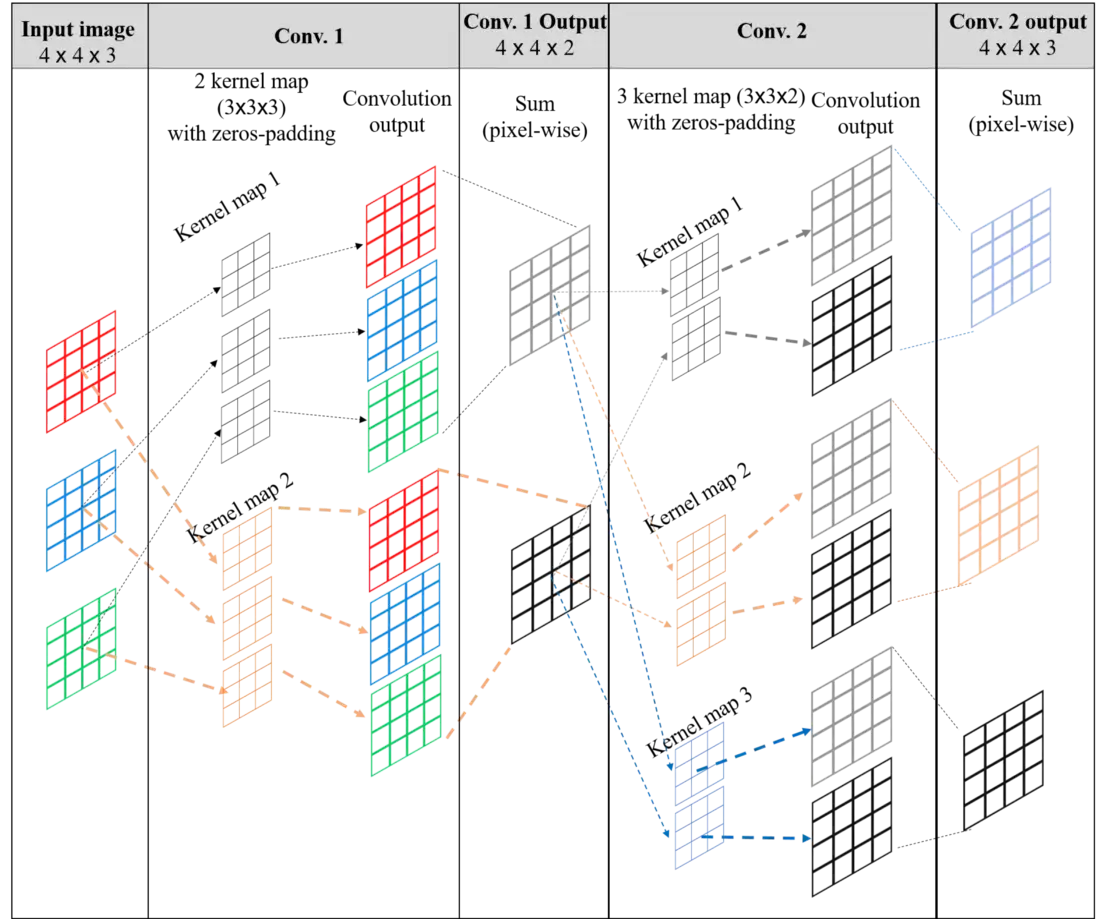

此範例為兩層的卷積，輸入為(長*寬*channel)<br>
輸入(channel=3)(2, 3, 3, 3) → Conv.1(channel=2)(3, 2, 3, 3) → Conv.2(channel=3)

conv = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, bias=False)\

conv weight => (out, in, height, width)


 
>**卷積神經網路基本上就是利用訓練資料和目標函數在找Kernel maps的數字(權重)應該是多少?**<br>

我們開始細數介紹在pytorch上跟Conv.相關的所有介紹。

## 1. Conv.的參數介紹

我們先看一下pytorch內[nn.Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)的參數定義
```
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
```
>pytorch的2D Conv.要輸入的資料是$(N, C_{in}, H, W)$，輸出則是$(N, C_{out}, H_{out}, W_{out})$<br>
$N$: Batch size<br>
$C$: Channel size<br>
$H$: 特徵圖的高(單位Pixel)<br>
$W$: 特徵圖的寬(單位Pixel)<br>


參數設定的項目有<br>
```in_channels```: $ C_{in}$ 輸入特徵圖的channel數。<br>
```out_channels```: $ C_{out}$ 輸出特徵圖的channel數。 <br>
```kernel_size```: 卷積的kernel大小。<br>
```stride=1```: 步伐大小，如果為1代表kernel map步伐一次移動一個pixel，為2代表kernel map步伐一次移動兩個pixel。<br>
```padding```: 輸入圖是否需要生出額外的邊(元素皆為0)。<br>
```dilation```: atrous convolution空洞卷積設定。<br>
```groups```: Group convolution設定，將輸入和輸出的channel進行分組，```in_channels```和```out_channels```必須要能被```groups```整除。且當in_channels=out_channels=groups就是depthwise Conv.<br> 
```bias```: 輸出的channel需要bias嗎? True(default) or False。<br> 







## 權重矩陣創建 torch.nn.Conv2d


<font size=6>**範例1:bias有沒有設定的差異** </font>

| Example   | # input channel | # output channel | kernel size | bias   |
| :-----:   | :----:          | :----:           |   :----:     | :----: | 
| Example 1 |  1              |  2               |   3          |  1     |
| Example 2 |  1              |  2               |   3          |  0     |

In [12]:
# input channel = 1
# output channel = 2
# kernel size = 3
# stride = 1
# bias = True

import torch
import torch.nn as nn
import numpy as np

conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3,stride=1, bias=True)

print('- Weight of conv layer:\n\t{}'.format(conv.weight))

print('- Weight(shape) of conv layer:{}'.format(conv.weight.shape))

print('+ Bias of conv layer:\n\t{}'.format(conv.bias))

print('+ Bias(shape) of conv layer:{}'.format(conv.bias.shape))



- Weight of conv layer:
	Parameter containing:
tensor([[[[-0.2280,  0.0463, -0.3170],
          [ 0.2956,  0.0148,  0.1464],
          [ 0.0978, -0.1163,  0.1951]]],


        [[[-0.0897, -0.0251,  0.1407],
          [ 0.0309,  0.0023, -0.2276],
          [-0.0538, -0.1921,  0.2427]]]], requires_grad=True)
- Weight(shape) of conv layer:torch.Size([2, 1, 3, 3])
+ Bias of conv layer:
	Parameter containing:
tensor([ 0.2895, -0.0466], requires_grad=True)
+ Bias(shape) of conv layer:torch.Size([2])


In [2]:
# input channel = 1
# output channel = 2
# kernel size = 3
# stride = 1
# bias = False

conv = nn.Conv2d(in_hacnnels=1, out_channels=2, kernel_size=3, stride=1, bias=False)

print('- Weight of conv layer:\n\t{}'.format(conv.weight))

print('- Weight(shape) of conv layer:{}'.format(conv.weight.shape))

print('+ Bias of conv layer:\n\t{}'.format(conv.bias))



- Weight of conv layer:
	Parameter containing:
tensor([[[[ 0.0225, -0.2054, -0.1621],
          [ 0.1299,  0.2871,  0.2658],
          [-0.1420, -0.1580, -0.0576]]],


        [[[ 0.3136, -0.2499,  0.1335],
          [ 0.3052,  0.0042,  0.3153],
          [ 0.1213,  0.2221,  0.1665]]]], requires_grad=True)
- Weight(shape) of conv layer:torch.Size([2, 1, 3, 3])
+ Bias of conv layer:
	None


<font size=6>**範例2: Input channel和output channel都增加** </font>

| Example   | # input channel | # output channel | kernel sizse | bias   |
| :-----:   | :----:          | :----:           |   :----:     | :----: | 
| Example 1 |  2              |  2               |   3          |  0     |
| Example 2 |  2              |  3               |   3          |  0     |


In [13]:
# input channel = 2
# output channel = 2
# kernel size = 3
# stride = 1
# bias = False

conv = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, stride=1, bias=False)
print('- Weight of conv layer:\n\t{}'.format(conv.weight))
print('- Weight(shape) of conv layer:{}'.format(conv.weight.shape))
print('+ Bias of conv layer:\n\t{}'.format(conv.bias))



- Weight of conv layer:
	Parameter containing:
tensor([[[[ 0.1500,  0.0143, -0.2001],
          [ 0.1600, -0.0867,  0.1599],
          [-0.1897, -0.2305,  0.2345]],

         [[-0.1929, -0.1366, -0.1218],
          [-0.1305, -0.1107, -0.0723],
          [ 0.1341, -0.0115, -0.0350]]],


        [[[ 0.0687,  0.0078,  0.0267],
          [-0.0335,  0.1396, -0.0373],
          [-0.2244,  0.0987, -0.1701]],

         [[ 0.1493,  0.0622, -0.1257],
          [ 0.2178, -0.2162, -0.1691],
          [-0.1724,  0.0702, -0.1484]]]], requires_grad=True)
- Weight(shape) of conv layer:torch.Size([2, 2, 3, 3])
+ Bias of conv layer:
	None


In [4]:
# input channel = 2
# output channel = 3
# kernel size = 3
# stride = 1
# bias = False


conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=3, stride=1, bias=False)
print('- Weight of conv layer:\n\t{}'.format(conv.weight))
print('- Weight(shape) of conv layer:{}'.format(conv.weight.shape))



- Weight of conv layer:
	Parameter containing:
tensor([[[[-0.2264, -0.1518,  0.0572],
          [ 0.0826, -0.0887,  0.1097],
          [-0.0820, -0.2165,  0.2172]],

         [[ 0.1036,  0.1054, -0.0937],
          [-0.0106,  0.1337, -0.1254],
          [-0.1731, -0.1774,  0.1178]]],


        [[[-0.2147, -0.2168,  0.1688],
          [-0.1591,  0.2269,  0.0056],
          [-0.0489, -0.0283, -0.2319]],

         [[ 0.0889,  0.0570, -0.0058],
          [ 0.0344, -0.1153, -0.2122],
          [-0.1845, -0.1865,  0.1030]]],


        [[[ 0.1606, -0.1456, -0.2127],
          [-0.2354, -0.1040,  0.0940],
          [-0.1904,  0.1790,  0.1473]],

         [[ 0.1002, -0.0993, -0.1977],
          [ 0.1361,  0.2266, -0.0008],
          [-0.2305,  0.1300,  0.0192]]]], requires_grad=True)
- Weight(shape) of conv layer:torch.Size([3, 2, 3, 3])


從上面大量的範例可以看到卷積Conv.2D的weight擺放方式是<br>
$$channel_{output} \times channel_{input} \times ks \times ks$$

<font color='red' size=6>**Note: Conv除了方形，也可以為長方形的型態**</font>

In [14]:
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(3,1), stride=1, bias=False)
print(conv.weight)   
print(conv.weight.shape)
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(3,2), stride=1, bias=False)
print(conv.weight.shape)

Parameter containing:
tensor([[[[ 0.1187],
          [-0.3318],
          [ 0.0919]],

         [[ 0.3643],
          [-0.3250],
          [-0.2236]]],


        [[[ 0.3452],
          [ 0.0581],
          [-0.1113]],

         [[-0.2878],
          [-0.2518],
          [ 0.3327]]],


        [[[-0.0546],
          [-0.1529],
          [ 0.3292]],

         [[-0.0047],
          [-0.2267],
          [-0.1278]]]], requires_grad=True)
torch.Size([3, 2, 3, 1])
torch.Size([3, 2, 3, 2])


## 自定義 Conv 權重

<font size=4>
    剛剛我們用conv.weight可以看到權重值，所以看的到就能指定值進去。<br>
    但不是直接塞到conv.weight，因為是class參數(torch.nn.parameter.Parameter)，不是torch.tensor<br>
    因此需塞到的位置是conv.weight.data (屬性為torch.tensor)<br>
    同樣要改bias，也是去改conv.同樣要改bias.data<br>
    </font>

In [49]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1)

print(f'weight of conv layer:\n{conv.weight}')

print(f'bias of conv layer:\n{conv.bias}')


weight of conv layer:
Parameter containing:
tensor([[[[-0.1828,  0.1715, -0.0973],
          [-0.3292,  0.0685, -0.3217],
          [ 0.0849, -0.1877,  0.0788]]]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0.3116], requires_grad=True)


In [51]:
replace_weight = torch.tensor([[0,0,0],
                               [1,2,3],
                               [4,5,6]], dtype=torch.float32)
replace_bias = torch.tensor([10000000000000.1])

conv.weight.data=replace_weight
conv.bias.data=replace_bias

print(f'weight of conv layer:\n{conv.weight}')
print(f'bias of conv layer:\n{conv.bias}')



weight of conv layer:
Parameter containing:
tensor([[0., 0., 0.],
        [1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([1.0000e+13], requires_grad=True)


<font color=#0000FF size=6> **權重歸 0 初始化 zero_**
</font>

In [46]:
conv.weight.data.zero_()
conv.bias.data.zero_()
print(f'weight of conv layer:\n{conv.weight}')
print(f'bias of conv layer:\n{conv.bias}')



weight of conv layer:
Parameter containing:
tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0.], requires_grad=True)


<font color=#0000FF size=6> **權重填充 fill()**
</font>

In [9]:
conv.weight.data.fill_(1)
conv.bias.data.fill_(1)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

######################################

conv.weight.data.fill_(0)
conv.bias.data.fill_(0)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

######################################

conv.weight.data.fill_(200)
conv.bias.data.fill_(10)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))



**************************************************
weight of conv layer:
Parameter containing:
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([1], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[200, 200, 200],
        [200, 200, 200],
        [200, 200, 200]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([10], requires_grad=True)


# Conv. 卷積計算方式

**Example 1**: <br>
<font size = 3>Conv. 單一channel輸入，單一輸出.

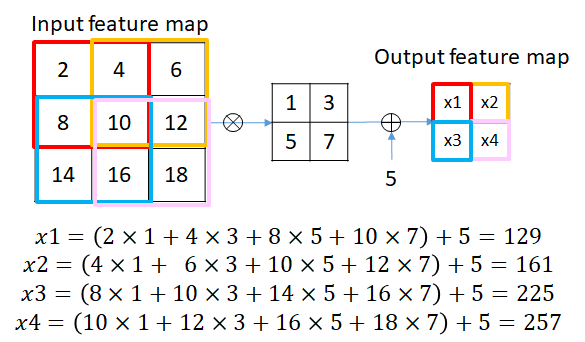

In [61]:
# n * c * h * w
# unsqueeze 提升維度

InputImage = torch.FloatTensor([[ 2, 4, 6],
                                [ 8,10,12],
                                [14,16,18]]).unsqueeze(axis=0).unsqueeze(axis=0) # 1,1,3,3 # batch * channel * H * W

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1)

# filter map (feature map)
replace_weight = torch.FloatTensor([[1,3],
                                    [5,7]]).unsqueeze(axis=0).unsqueeze(axis=0) # 1,1,2,2

replace_bias = torch.tensor([5], dtype=torch.float32)
conv.weight.data=replace_weight
conv.bias.data=replace_bias


print(f'Input feature map:{InputImage}')
print(f'weight of conv.:{conv.weight.data}')
print(f'bias of conv.:{conv.bias.data}')


output = conv(InputImage)
print('Output feature map:{}'.format(output))



Input feature map:tensor([[[[ 2.,  4.,  6.],
          [ 8., 10., 12.],
          [14., 16., 18.]]]])
weight of conv.:tensor([[[[1., 3.],
          [5., 7.]]]])
bias of conv.:tensor([5.])
Output feature map:tensor([[[[129., 161.],
          [225., 257.]]]], grad_fn=<ConvolutionBackward0>)


In [63]:
replace_weight = torch.FloatTensor([[1,3],
                                    [5,7]]).unsqueeze(axis=0).unsqueeze(axis=0) # 1,1,2,2

print(replace_weight)

replace_weight = torch.FloatTensor([[1,3],
                                    [5,7]]).view(1,1,2,2)

print(replace_weight)

tensor([[[[1., 3.],
          [5., 7.]]]])
tensor([[[[1., 3.],
          [5., 7.]]]])


**Example 2**: <br>
<font size = 3>Conv. 兩個channel輸入，兩個channel輸出.
    
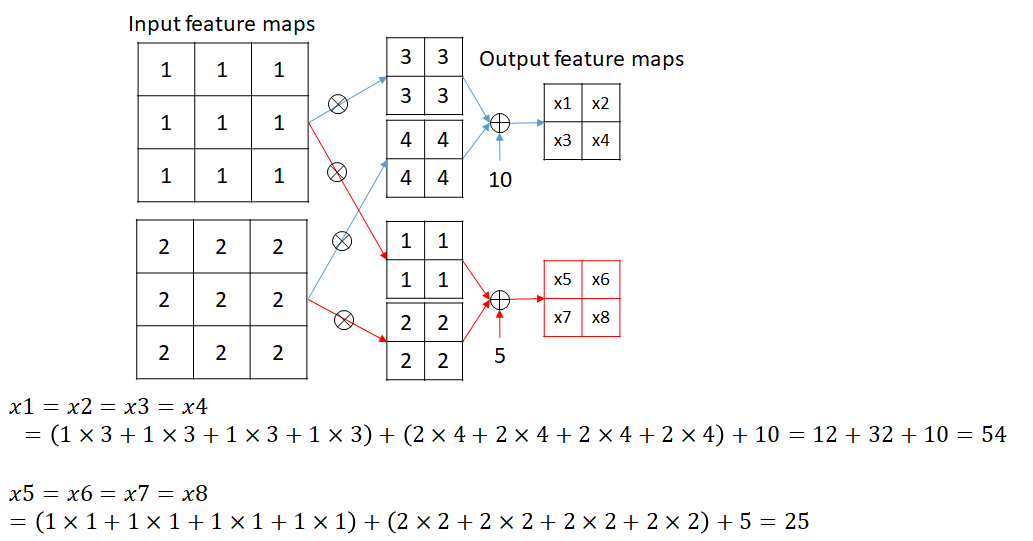

In [75]:
InputImage = torch.FloatTensor([
                                [[ 1,1,1],
                                 [ 1,1,1],
                                 [ 1,1,1]],

                                [[ 2,2,2],
                                 [ 2,2,2],
                                 [ 2,2,2]]

                                ]).unsqueeze(axis=0) # 1*2*3*3


conv = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=2, stride=1) # 2*2*2*2
replace_weight = torch.FloatTensor([
                                    [[[3,3],
                                     [3,3]],

                                    [[4,4],
                                     [4,4]]],
    
                                    [[[1,1],
                                     [1,1]],

                                    [[2,2],
                                     [2,2]]]
                                    ])

replace_bias = torch.tensor([10,5], dtype=torch.float32)
conv.weight.data=replace_weight
conv.bias.data=replace_bias

print('Input feature map:{}'.format(InputImage))
print('weight of conv.:{}'.format(conv.weight.data))
print('bias of conv.:{}'.format(conv.bias.data))

output = conv(InputImage)



Input feature map:tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]]]])
weight of conv.:tensor([[[[3., 3.],
          [3., 3.]],

         [[4., 4.],
          [4., 4.]]],


        [[[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]]]])
bias of conv.:tensor([10.,  5.])


## Conv.權重初始生成

利用內建函數將Conv.權重指定為某種/特定分布<br>

預設是權重初始值是從均勻分布生成`

(array([18., 14., 21., 26., 15., 21., 28., 17., 19., 12., 21., 19., 28.,
        18., 11., 25., 20., 20., 21., 22., 17., 19., 12., 22., 18., 26.,
        20., 25., 12., 20., 18., 20., 10., 28., 27., 15., 21., 24., 21.,
        20., 25., 27., 17., 15., 24., 19., 25., 21., 14., 22.]),
 array([-3.16169895e-02, -3.03525031e-02, -2.90880166e-02, -2.78235320e-02,
        -2.65590455e-02, -2.52945591e-02, -2.40300726e-02, -2.27655862e-02,
        -2.15011016e-02, -2.02366151e-02, -1.89721286e-02, -1.77076422e-02,
        -1.64431557e-02, -1.51786702e-02, -1.39141846e-02, -1.26496982e-02,
        -1.13852117e-02, -1.01207262e-02, -8.85623973e-03, -7.59175373e-03,
        -6.32726774e-03, -5.06278174e-03, -3.79829551e-03, -2.53380951e-03,
        -1.26932340e-03, -4.83728945e-06,  1.25964882e-03,  2.52413494e-03,
         3.78862093e-03,  5.05310716e-03,  6.31759316e-03,  7.58207915e-03,
         8.84656515e-03,  1.01110516e-02,  1.13755371e-02,  1.26400236e-02,
         1.39045101e-02,  1.5168

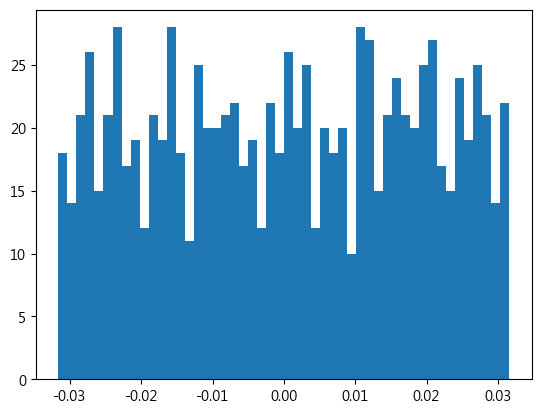

In [76]:
import matplotlib.pyplot as plt

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
data = conv.weight.data

plt.hist(np.squeeze(data.numpy()),50)


Example 1: 常態分布(Normal Distribution) $N(0,1)$

In [13]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3), stride=1)

print('weight of conv layer:\n{}'.format(conv.weight))
print('*'*50)

conv.weight.data.normal_(0,1)

print('weight of conv layer:\n{}'.format(conv.weight))



weight of conv layer:
Parameter containing:
tensor([[[[-0.0863,  0.1998,  0.2673],
          [ 0.2281, -0.1071,  0.1783],
          [ 0.0099,  0.2287,  0.0534]]]], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[[[-0.3358, -0.5335,  0.7813],
          [ 0.5229, -0.8187,  0.9784],
          [-0.3718,  0.1866, -0.6776]]]], requires_grad=True)


(array([ 1.,  2.,  0.,  0.,  0.,  1.,  0.,  2.,  5.,  6.,  5., 15.,  7.,
        13., 13., 19., 23., 29., 42., 33., 42., 45., 51., 52., 51., 61.,
        46., 40., 47., 50., 39., 34., 38., 32., 28., 28., 23., 24., 10.,
        12., 12.,  7.,  3.,  7.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-3.46519947, -3.33064008, -3.19608092, -3.06152153, -2.92696214,
        -2.79240298, -2.65784359, -2.5232842 , -2.38872504, -2.25416565,
        -2.11960626, -1.98504698, -1.85048771, -1.71592832, -1.58136904,
        -1.44680977, -1.31225038, -1.1776911 , -1.04313183, -0.90857244,
        -0.77401316, -0.63945383, -0.5048945 , -0.37033519, -0.23577587,
        -0.10121655,  0.03334276,  0.16790208,  0.30246139,  0.43702072,
         0.57158005,  0.70613933,  0.84069866,  0.97525799,  1.10981727,
         1.24437666,  1.37893593,  1.51349521,  1.6480546 ,  1.78261387,
         1.91717315,  2.05173254,  2.18629193,  2.32085109,  2.45541048,
         2.58996987,  2.72452903,  2.85908842,  2.99364781,

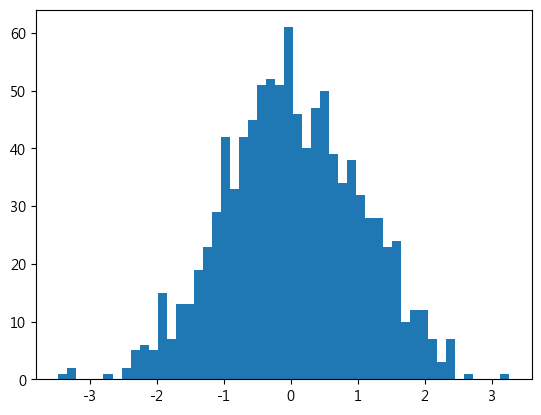

In [90]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
conv.weight.data.normal_(0,1)

data = conv.weight.data
data = data.numpy()
data = np.squeeze(data)

plt.hist(data,50)

## 權重那要用哪生成方式

<font  size=4>
- 1. 不用理他，用default就好 <br>
- 2. Xavier系列: Xavier均匀分布、Xavier常態分布 <br>
- 3. kaiming系列: kaiming均匀分布、kaiming常態分布 <br>
- 4. 我要自己發明，但有哪些函數可以用

>Note:<br>
    - 參數初始化可以見torch.nn.init。 <br>
    - 均勻分布 = uniform distribution <br>
    - 常態分布 = normal distribution <br>
    有興趣知道為什麼要這樣設定的可以看我以前寫的文章[深度學習: Weight initialization和Batch Normalization](https://chih-sheng-huang821.medium.com/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-weight-initialization%E5%92%8Cbatch-normalization-f264c4be37f5)
    </font>

In [15]:
def histforConv(conv):
    data = conv.weight.data
    data = torch.flatten(data)
    plt.hist(np.squeeze(data.numpy()),50)
    plt.show()

### + 1. 不用理他，用default就好 <br>
Default用什麼生成，我們來看一下他的生成方式。

default是用均勻分布
$$U(-stdv, stdv)$$
stdv為
$$
stdv = \frac{1}{\sqrt{x}}
$$
x=(Input channel個數*kernel size)

下範例: 
$$
stdv = \frac{1}{\sqrt{x}} = \frac{1}{\sqrt{10\times10\times10}} = 0.0316228
$$

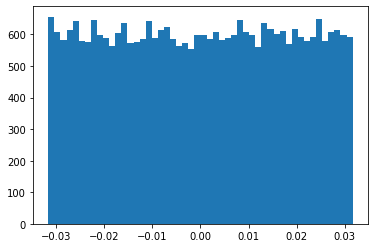

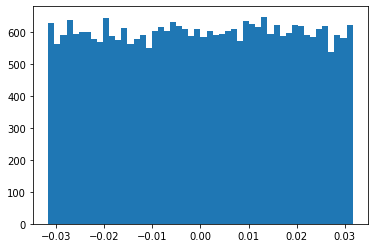

In [16]:
import math
conv = nn.Conv2d(in_channels=10, out_channels=30, kernel_size=(10,10), stride=1) # 30,10,10,10
histforConv(conv)

stdv = 1. / math.sqrt(conv.weight.size(1)*conv.weight.size(2)*conv.weight.size(3))
conv.weight.data.uniform_(-stdv, stdv)
histforConv(conv)


### +2. Xavier系列: Xavier均匀分布、Xavier常態分布

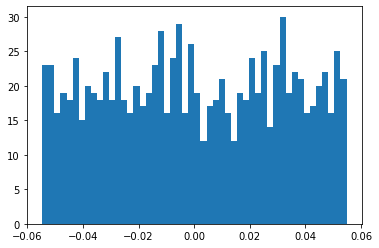

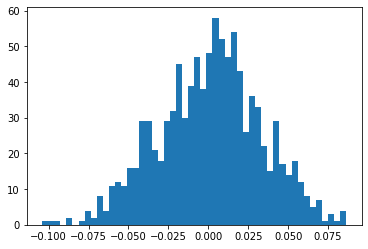

In [17]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.xavier_uniform_(conv.weight)
histforConv(conv)

nn.init.xavier_normal_(conv.weight)
histforConv(conv)

也靠參數(gain)設定可以調整分布的範圍

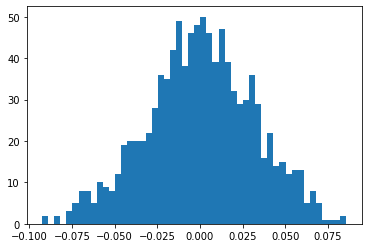

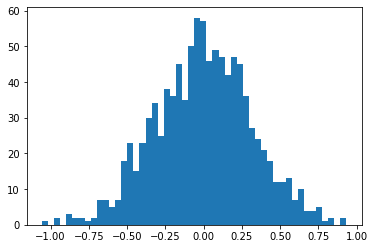

In [18]:
nn.init.xavier_normal_(conv.weight)
histforConv(conv)
nn.init.xavier_normal_(conv.weight, gain=10)
histforConv(conv)

### +3. kaiming系列: kaiming均匀分布、kaiming常態分布 <br>

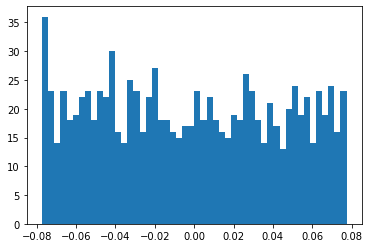

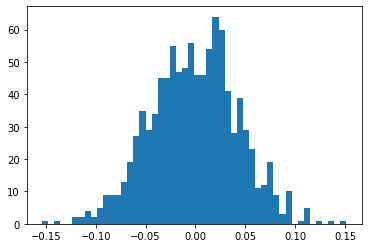

In [19]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.kaiming_uniform_(conv.weight)
histforConv(conv)

nn.init.kaiming_normal_(conv.weight)
histforConv(conv)

### +4. 我要自己發明，但有哪些函數可以用<br>

Reference: [TORCH.NN.INIT](https://pytorch.org/docs/stable/nn.init.html?highlight=nn%20init%20sparse_#torch.nn.init.sparse_)

----------------
1. 均勻分布，參數服從均勻分布a到b之間: <br>
$$
U(a,b)
$$
<code>torch.nn.init.uniform_(tensor, a=0, b=1)</code>

----------------    
2. 常態分布，參數服從常態分布，default為平均數0 標準差1: <br>
$$
N(mean,std)
$$
<code>torch.nn.init.normal_(tensor, mean=0, std=1)</code>  

----------------    
3. 設定為常數 <br>
<code>torch.nn.init.constant_(tensor, val)</code>

----------------
4. 單位化矩陣設定 <br>
<code>torch.nn.init.eye_(tensor)</code>

----------------
5. 正交 <br>
讓生成的權重之間會正交。（必須至少是2維的，對於更高維度的張量，超出的維度會被展平，視作行等於第一個維度。<br>
<code>torch.nn.init.orthogonal_(tensor, gain=1)</code>

----------------
6. sparsity <br>
讓參數生成的時候會稀疏化。
參數sparsity設定為每一列要設定為0的比例。<br>
其他非0的參數生成採用$N(0, std)$，預設std=0.01。<br>
<code>torch.nn.init.sparse_(tensor, sparsity, std=0.01)</code>

----------------

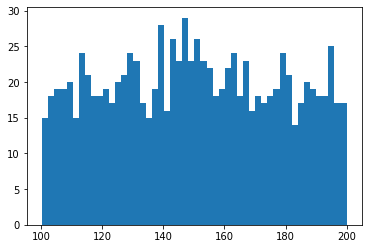

In [20]:
# 1. 均勻分布，參數服從均勻分布a到b之間
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.uniform_(conv.weight,a=100, b=200)
histforConv(conv)

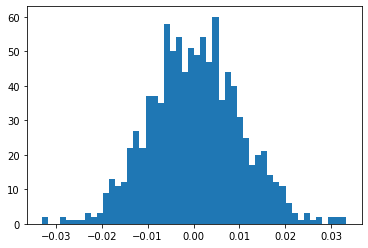

In [21]:
# 2. 常態分布，參數服從常態分布，default為平均數0 標準差1
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.normal_(conv.weight,mean=0, std=0.01)
histforConv(conv)

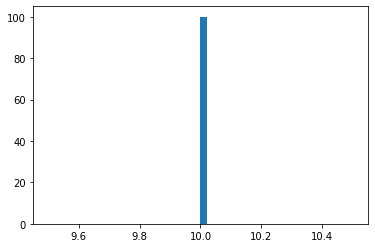

In [22]:
# 3. 設定為常數
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(100,1), stride=1)
nn.init.constant_(conv.weight,val=10)
histforConv(conv)

In [23]:
# 4. 單位化矩陣設定
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,5), stride=1)
nn.init.eye_(conv.weight.data[0,0,:,:])
print('weight of conv layer:\n{}'.format(conv.weight))

weight of conv layer:
Parameter containing:
tensor([[[[1., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 1.]]]], requires_grad=True)


In [24]:
# 5. 正交 
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=(2,1), stride=1)
nn.init.orthogonal_(conv.weight)
print('weight of conv layer:\n{}'.format(conv.weight))

data = conv.weight.data
print(data.shape)
data = data.numpy()[:,0,:,0]
print(np.dot(data,np.transpose(data)))


conv = nn.Conv2d(in_channels=10, out_channels=4, kernel_size=(1,1), stride=1)
nn.init.orthogonal_(conv.weight)
data = conv.weight.data
print(data.shape)
data = data.numpy()[:,:,0,0]
print(np.dot(data,np.transpose(data)))


weight of conv layer:
Parameter containing:
tensor([[[[-0.7493],
          [ 0.6623]]],


        [[[ 0.6623],
          [ 0.7493]]]], requires_grad=True)
torch.Size([2, 1, 2, 1])
[[9.999999e-01 7.129256e-08]
 [7.129256e-08 1.000000e+00]]
torch.Size([4, 10, 1, 1])
[[ 9.9999988e-01  3.7745316e-08  1.2014393e-08 -2.3293765e-08]
 [ 3.7745316e-08  1.0000000e+00 -1.5633473e-08 -9.5799688e-09]
 [ 1.2014393e-08 -1.5633473e-08  1.0000000e+00  1.3885448e-08]
 [-2.3293765e-08 -9.5799688e-09  1.3885448e-08  9.9999988e-01]]


In [25]:
# 6. sparsity 
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,5), stride=1)
nn.init.sparse_(conv.weight.data[0,0,:,:], sparsity=0.3, std=10)
print('weight of conv layer:\n{}'.format(conv.weight))

weight of conv layer:
Parameter containing:
tensor([[[[  9.1124,   0.0000,  22.7076, -17.3006,   5.8026],
          [-10.8578,  -1.5217,   0.0000,   0.0000,   7.6291],
          [  0.0000, -15.3814,  -7.1043,  -7.4126,   0.0000],
          [ -1.4954,   4.5001,  13.9835,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  -2.8287, -15.6034]]]],
       requires_grad=True)


## II. Pytorch 怎麼使用Pool、Activation function和宣告自己想建立的結構<br>


<font size=4> 
   
   1. Pool example <br><br>
   2. Activation example: 要怎麼建立自己的Activation function <br><br>
   3. 建立自己設計的積木
      > - ResBlock (ResNet) <br>
      > - Depthwise Conv. (MobileNet) <br>
      > - DenseBlock (DenseNet) <br>
      > - InceptionBlock (InceptionNetv1 = GoogLeNet) <br>
   4. Softmax
</font>

In [1]:
import torch
import torch.nn as nn
import numpy as np

------------------
# Pool example
<font size=3>
- 1. Max-pooling: ks=2, stride=2<br>
- 2. Average pooling : ks=2, stride=2<br>
- 3. Global Average Pooling (GAP)<br>
</font>

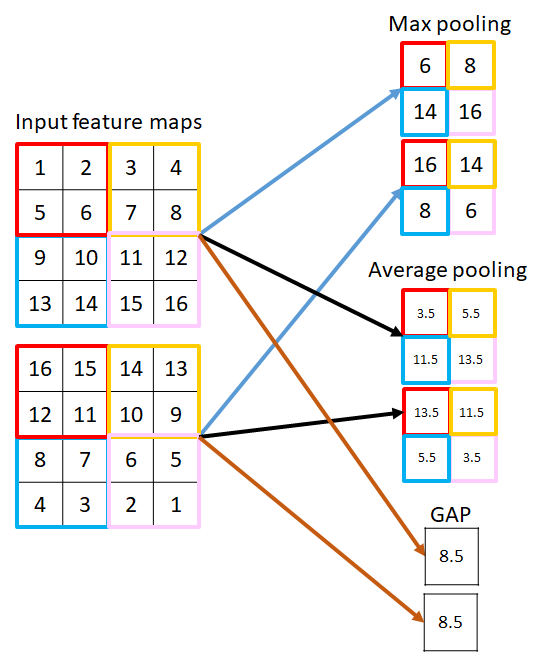

In [4]:
InputImage = torch.FloatTensor([
                                [[ 1, 2, 3, 4],
                                 [ 5, 6, 7, 8],
                                 [ 9,10,11,12],
                                 [13,14,15,16]],
                                [[16,15,14,13],
                                 [12,11,10, 9],
                                 [ 8, 7, 6, 5],
                                 [ 4, 3, 2, 1]]
                                ]).unsqueeze(axis=0) # 1*2*4*4


maxpool = nn.MaxPool2d(kernel_size=2, stride=2) # 
print('Input feature map:\n{}'.format(InputImage))
output = maxpool(InputImage)
print('\nOutput feature map after max pooling:\n{}'.format(output))


avgpool = nn.AvgPool2d(kernel_size=2, stride=2) #
output = avgpool(InputImage)
print('\nOutput feature map after avg pooling:\n{}'.format(output))


output = nn.functional.adaptive_avg_pool2d(InputImage, 1).reshape(InputImage.shape[0], -1)
print('\nOutput feature map after GAP:\n{}'.format(output))
print(output.shape)

Input feature map:
tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]],

         [[16., 15., 14., 13.],
          [12., 11., 10.,  9.],
          [ 8.,  7.,  6.,  5.],
          [ 4.,  3.,  2.,  1.]]]])

Output feature map after max pooling:
tensor([[[[ 6.,  8.],
          [14., 16.]],

         [[16., 14.],
          [ 8.,  6.]]]])

Output feature map after avg pooling:
tensor([[[[ 3.5000,  5.5000],
          [11.5000, 13.5000]],

         [[13.5000, 11.5000],
          [ 5.5000,  3.5000]]]])

Output feature map after GAP:
tensor([[8.5000, 8.5000]])
torch.Size([1, 2])


# 建立自己設計的積木
<font size=4>
    1. ResBlock (ResNet) <br>
    2. Depthwise Conv. (MobileNet) <br>
    3. DenseBlock (DenseNet) <br>
    4. InceptionBlock (InceptionNetv1 = GoogLeNet) <br>
    
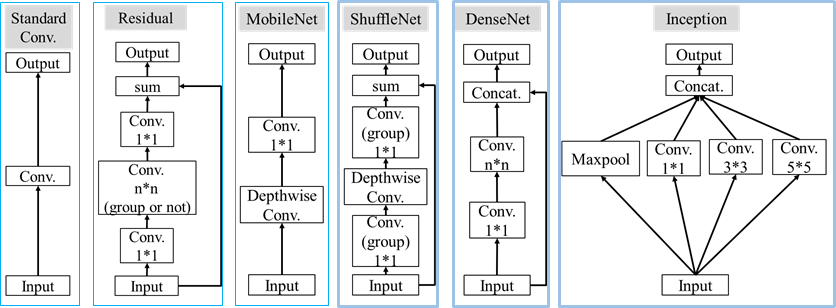

<font size=4>
    1. ResBlock (ResNet) <br>

In [7]:
class ResBlock(nn.Module):
    def __init__( self, inplanes: int, planes: int,  stride: int = 1) -> None:
        super(ResBlock, self).__init__()
        norm_layer = nn.BatchNorm2d
        
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, stride=stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,padding=1)
        self.bn2 = norm_layer(planes)
        
        self.conv3 = nn.Conv2d(planes, inplanes, kernel_size=1, stride=stride)
        self.bn3 = norm_layer(inplanes)       
        
    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)
        
        out += identity
        out = self.relu(out)
        return out
ResConv = ResBlock(inplanes=3,planes=10)
print(ResConv)


ResBlock(
  (conv1): Conv2d(3, 10, kernel_size=(1, 1), stride=(1, 1))
  (bn1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(10, 3, kernel_size=(1, 1), stride=(1, 1))
  (bn3): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


<font size=4> 看上面可能還看不出來我們打得程式碼和實際我們想像的有沒有一樣<br>
    我們採用onnx file輸出，並且用[Netron](https://netron.app/)來做視覺化呈現

In [8]:
dummy_inpurt = torch.rand(1,3,512,512)
out=ResConv(dummy_inpurt)
torch.onnx.export(ResConv, dummy_inpurt, './ResConv.onnx', opset_version=11, example_outputs=out)

C:\Users\glanb\anaconda3\lib\site-packages\torch\onnx\utils.py:100: UserWarning: `example_outputs' is deprecated and ignored. Will be removed in next PyTorch release.
  warnings.warn("`example_outputs' is deprecated and ignored. Will be removed in "


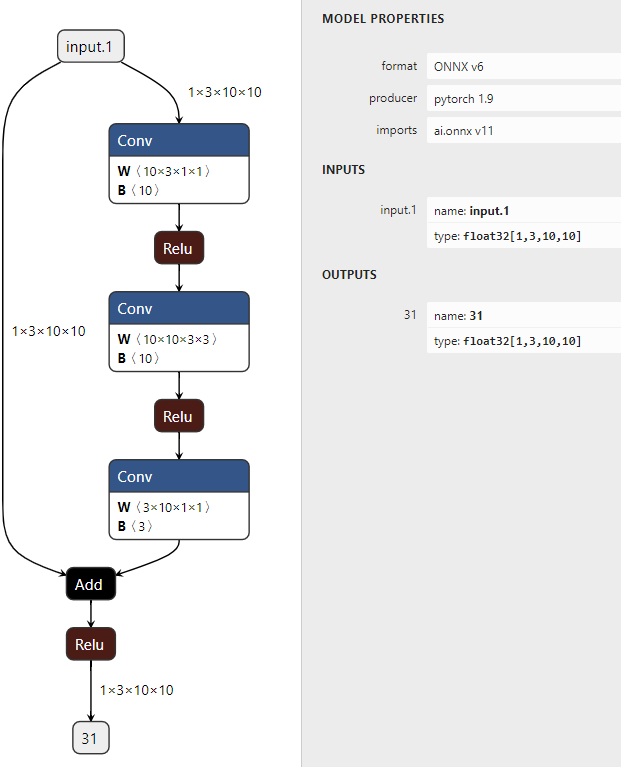

<font size=4>
    2. Depthwise Conv. (MobileNet) <br>
Depthwise = Group conv ( group = inchannel = outchannel)

In [9]:
class DepthwiseSeparable_Conv(nn.Module):
    def __init__( self, inplanes: int, outplanes: int, stride: int = 1) -> None:
        super(DepthwiseSeparable_Conv, self).__init__()
        norm_layer = nn.BatchNorm2d
        
        self.conv1 = nn.Conv2d(inplanes, inplanes, 3, stride, 1, groups=inplanes, bias=False)
        self.bn1 = norm_layer(inplanes)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(inplanes, outplanes, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn2 = norm_layer(outplanes)
     
    def  forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        return out
DSconv = DepthwiseSeparable_Conv(inplanes=3,outplanes=10)
print(DSconv)
        
dummy_inpurt = torch.rand(1,3,10,10)
out=DSconv(dummy_inpurt)
torch.onnx.export(DSconv, dummy_inpurt, './DSconv.onnx', opset_version=11, example_outputs=out)        


DepthwiseSeparable_Conv(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3, bias=False)
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(3, 10, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


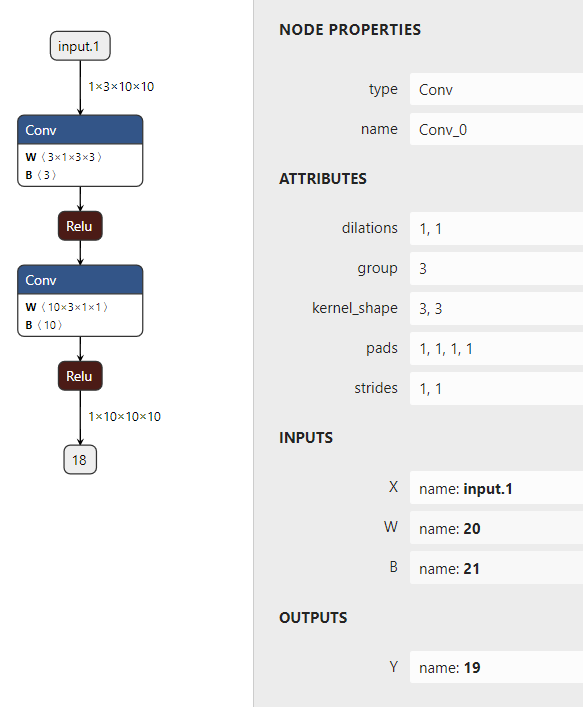

<font size=4>前面一堆component宣告，在forward要一個一個打出來，有沒有辦法包的更簡單，
可以用nn.Sequential來打包。

In [11]:
class DepthwiseSeparable_Conv(nn.Module):
    def __init__( self, inplanes: int, outplanes: int, stride: int = 1) -> None:
        super(DepthwiseSeparable_Conv, self).__init__()
        norm_layer = nn.BatchNorm2d
        
        self.conv_dws =  nn.Sequential(
            nn.Conv2d(inplanes, inplanes, 3, stride, 1, groups=inplanes, bias=False),
            norm_layer(inplanes),
            nn.ReLU(inplace=True),

            nn.Conv2d(inplanes, outplanes, kernel_size=1, stride=1, padding=0, bias=False),
            norm_layer(outplanes),
            nn.ReLU(inplace=True),
        )
     
    def  forward(self, x):
        out = self.conv_dws(x)
        return out
DSconv = DepthwiseSeparable_Conv(inplanes=3,outplanes=10)
print(DSconv)
dummy_inpurt = torch.rand(1,3,10,10)
out=DSconv(dummy_inpurt)
torch.onnx.export(DSconv, dummy_inpurt, './DSconv.onnx', opset_version=11, example_outputs=out) 

DepthwiseSeparable_Conv(
  (conv_dws): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3, bias=False)
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(3, 10, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
)


<font size=4>
    3. DenseBlock (DenseNet) <br>
    DenseNet靠每次Conv.都是用少channel的量進行運算，然後幾次Conv.再將所有的特徵圖串聯在一起，這時候的特徵數夠多後，再利用1*1 Conv.降維度的同時進行特徵圖融合。

<img src="https://pytorch.org/assets/images/densenet1.png" style="border:none;">

    

In [12]:
class DenseBlock(nn.Module):
    def __init__(self, inplanes, outplanes, dropRate=0.0):
        super(DenseBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(inplanes, outplanes, kernel_size=3, stride=1,
                               padding=1, bias=False)
    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        return torch.cat([x, out], 1)
    
DenseB = DenseBlock(inplanes=3,outplanes=10)
print(DenseB)
dummy_inpurt = torch.rand(1,3,10,10)
out=DenseB(dummy_inpurt)
torch.onnx.export(DenseB, dummy_inpurt, './DenseBlock.onnx', opset_version=11, example_outputs=out) 

DenseBlock(
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
)


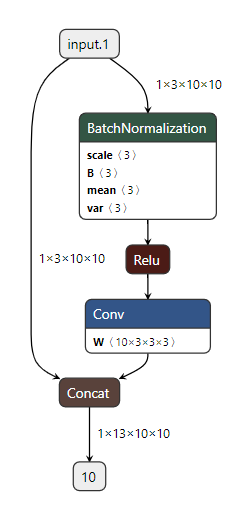

<font size=4>
    4. InceptionBlock (InceptionNetv1 = GoogLeNet) <br>
    
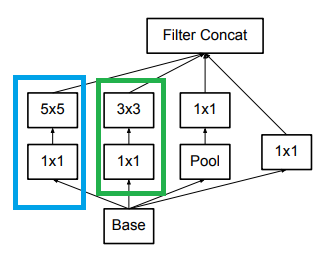

In [13]:
# Inception模块
class InceptionBlock(nn.Module):
    def __init__(self, in_channels, out_chanel_1, out_channel_3_reduce, out_channel_3,
                 out_channel_5_reduce, out_channel_5, out_channel_pool):
        super(InceptionBlock, self).__init__()

        self.block1 = nn.Conv2d(in_channels=in_channels, out_channels=out_chanel_1, kernel_size=1)
        
        self.block2 = nn.Sequential(
                      nn.Conv2d(in_channels=in_channels, out_channels=out_channel_3_reduce, kernel_size=1),
                      nn.Conv2d(in_channels=out_channel_3_reduce, out_channels=out_channel_3, kernel_size=3, padding=1))

        self.block3 = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=out_channel_5_reduce, kernel_size=1),
                      nn.Conv2d(in_channels=out_channel_5_reduce, out_channels=out_channel_5, kernel_size=5, padding=2))

        self.block4 = nn.Sequential(nn.MaxPool2d(kernel_size=3,stride=1,padding=1),
                     nn.Conv2d(in_channels=in_channels, out_channels=out_channel_pool, kernel_size=1))
    def forward(self, x):
        out1 = self.block1(x)
        out2 = self.block2(x)
        out3 = self.block3(x)
        out4 = self.block4(x)
        out = torch.cat([out1, out2, out3, out4], dim=1) #batch * (out1ch + out2ch + out3ch + out4ch)  * w * h
        return out

   
InceptionB = InceptionBlock(in_channels=128,
                            out_chanel_1=160, 
                            out_channel_3_reduce=112, out_channel_3=224,
                            out_channel_5_reduce=24, out_channel_5=64, 
                            out_channel_pool=64)
print(InceptionB)
dummy_inpurt = torch.randn(1,128,10,10)
out=InceptionB(dummy_inpurt)
torch.onnx.export(InceptionB, dummy_inpurt, './InceptionBlock.onnx', opset_version=11, example_outputs=out) 

InceptionBlock(
  (block1): Conv2d(128, 160, kernel_size=(1, 1), stride=(1, 1))
  (block2): Sequential(
    (0): Conv2d(128, 112, kernel_size=(1, 1), stride=(1, 1))
    (1): Conv2d(112, 224, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (block3): Sequential(
    (0): Conv2d(128, 24, kernel_size=(1, 1), stride=(1, 1))
    (1): Conv2d(24, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  )
  (block4): Sequential(
    (0): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
    (1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
  )
)


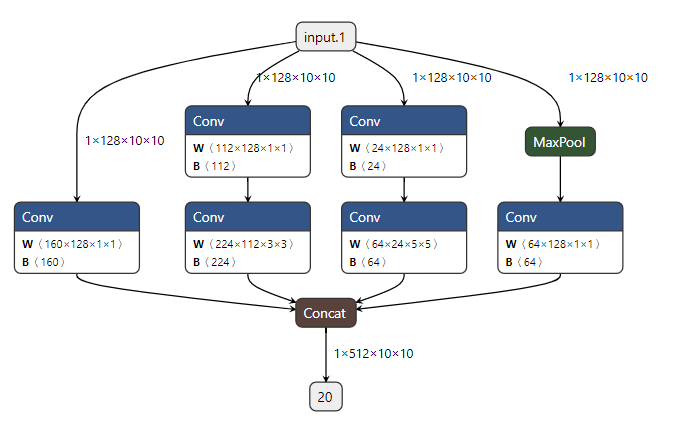

## 4. Softmax
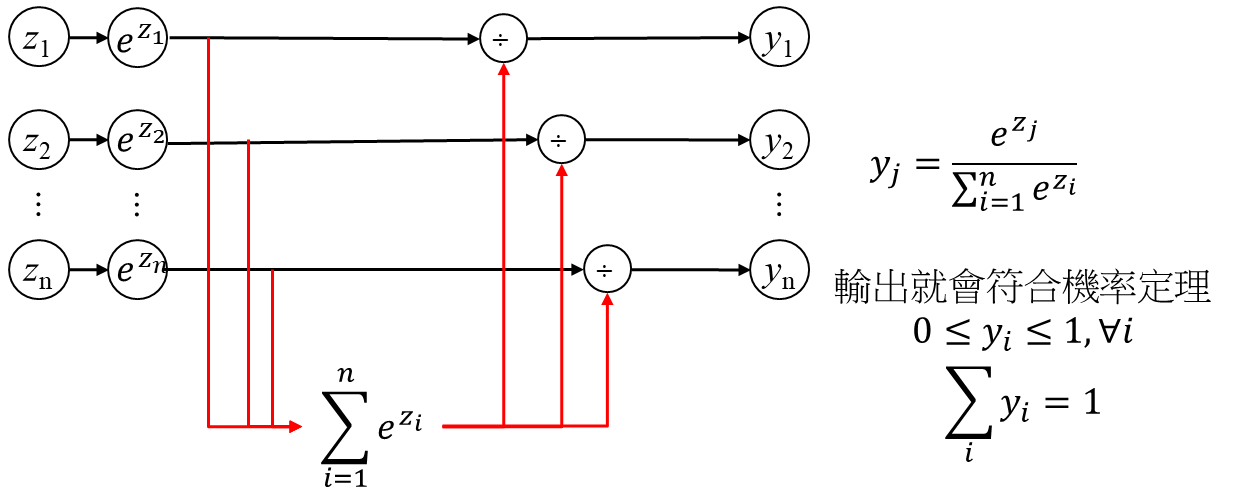

<font size=3> **Softmax Example 1:** <br>
<font size=3>模型輸出為-1和1

In [14]:
import numpy as np
logits = np.array([-1,1])
probability = np.exp(logits)/np.sum(np.exp(logits))

print('模型輸出為{}'.format(logits))
print('Softmax後模型輸出為{}'.format(probability))

模型輸出為[-1  1]
Softmax後模型輸出為[0.11920292 0.88079708]


<font size=3> **Softmax Example 2:** <br>
<font size=3>模型輸出為-10、0、1、20 <br>
    分別用numpy和pytorch去計算看看差異

In [15]:
import torch
# numpy
logits = np.array([-10,0,1,10])
probability1 = np.exp(logits)/np.sum(np.exp(logits))
print('模型輸出為:{}\n'.format(logits))
print('numpy Softmax後模型輸出為:{}\n'.format(probability1))

# pytorch
logits = torch.FloatTensor(logits)
probability2 = torch.nn.Softmax(dim=0)(logits)
print('pytorch Softmax後模型輸出為:{}\n'.format(probability2.numpy()))

# 兩者差異
print('兩者差:{}\n'.format(probability1-probability2.numpy()))

模型輸出為:[-10   0   1  10]

numpy Softmax後模型輸出為:[2.06080573e-09 4.53922670e-05 1.23388975e-04 9.99831217e-01]

pytorch Softmax後模型輸出為:[2.0608057e-09 4.5392266e-05 1.2338896e-04 9.9983120e-01]

兩者差:[-1.41484037e-17  1.26534279e-12  1.11701495e-11  1.70516135e-08]



In [16]:
# pytorch 改成 Double
logits = np.array([-10,0,1,10])
logits = torch.DoubleTensor(logits)
probability3 = torch.nn.Softmax(dim=0)(logits)
print('pytorch Softmax後模型輸出為:{}\n'.format(probability3.numpy()))

# 兩者差異
print('numpy和pytorch(Double)兩者差:{}\n'.format(probability1-probability3.numpy()))
print('pytorch(Float)和pytorch(Double)兩者差:{}\n'.format(probability2.numpy()-probability3.numpy()))

pytorch Softmax後模型輸出為:[2.06080573e-09 4.53922670e-05 1.23388975e-04 9.99831217e-01]

numpy和pytorch(Double)兩者差:[ 0.00000000e+00 -6.77626358e-21 -2.71050543e-20  0.00000000e+00]

pytorch(Float)和pytorch(Double)兩者差:[ 1.41484037e-17 -1.26534280e-12 -1.11701495e-11 -1.70516135e-08]

